# 4. Web Scraping - Scrapy

<img src='https://xn--kvin-duranty-beb.fr/wp-content/uploads/2022/10/Web-Scraping-_-IPSSI-PRS-3.png'>

Dans cet exercice, nous utiliserons la bibliothèque scrapy afin de collecter les données des sites internet suivants :

- Partie 1 : [AlloCiné](https://www.allocine.fr/film/meilleurs)
Nous collecterons les informations des meilleurs films recensés par la platforme.


- Partie 2 : [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)
Nous collecterons les données boursières des entreprises du CAC40.


# Parie 1 - Les meilleurs films selon [Allociné.fr](https://www.allocine.fr/film/meilleurs/)

<img src= 'https://fr.web.img2.acsta.net/newsv7/15/10/19/21/14/237930.jpg'>

L'objectif de cet exercice est de collecter les données des meilleurs films présents sur la page `https://www.allocine.fr/film/meilleurs/` du site allocine.fr.

Les données que nous collecterons seront les suivantes :
- Les titres du film
- Les liens des images
- Les noms des auteurs
- Les durées des films
- Les genres cinématographiques
- Les scores des films
- Les descriptions des films
- Les dates de sortie des films

## 4.1 Installez scrapy à l'aide de la commande suivante :


`pip install scrapy`

In [24]:
!pip install scrapy

## 4.2 Générez un environement de travail scrapy en executant la commande suivante :

In [25]:
# Création du dossier WebCrawler contenant l'ensemble des fichiers utiles au fonctionnement de scrapy
!scrapy startproject WebCrawler

Error: scrapy.cfg already exists in C:\Users\thomas.caron\Projects\webscraping\WebCrawler


In [26]:
# Création du projet AlloCiné dans le dossier WebCrawler/spider
!cd WebCrawler && scrapy genspider allocine https://www.allocine.fr/film/meilleurs

Spider 'allocine' already exists in module:
  WebCrawler.spiders.allocine


Les fichiers de scrapy que nous manipulerons seront :

1. le fichier `items.py` qui contient les champ que nous souhaitons collecter (ex : nom des films, score, date de publication). Chaque champs sera introduit dans la class `ReviewsAllocineItem` avec la nomenclature suivante : `name = scrapy.Field()`.


2. le fichier `allocine.py` qui contient les fonctions permettant la collecte.

## 4.3 Ajoutez dans le fichier `items.py` les champs que nous souhaitons collecter.

Ajoutez dans la class `ReviewsAllocineItem(scrapy.Item)` les champs suivants,
pour rappel la nomenclature des champs est la suivante :

`name = scrapy.Field()`.

- title
- img
- author
- time
- genre
- score
- desc
- release
- page

In [27]:
import scrapy


#À ajouter au fichier items.py
class ReviewsAllocineItem(scrapy.Item):
    title = scrapy.Field()
    img = scrapy.Field()
    author = scrapy.Field()
    time = scrapy.Field()
    genre = scrapy.Field()
    score = scrapy.Field()
    desc = scrapy.Field()
    release = scrapy.Field()

## 4.3 Lancez votre terminal puis exécutez la commande suivante :

C'est dans le terminale que nous intéragirons avec scrapy pour manipuler les bases du site allocine.fr

`scrapy shell`

`url = 'https://www.allocine.fr/film/meilleurs'`

`fetch(url)`

## 4.4 Exécutez dans votre terminal les commandes suivantes et notez vos observations.

Repérez les balises correspondantes.

`response`

`response.css('a')`

`len(response.css('a'))`

`response.css('a::text')`

`response.css('a')[0].attrib`

`response.css('a')[0].attrib['href']`

`response.css('a::text')[0].extract()`

`response.css('h1.item')`

`response.css('h1.item::text')`

`response.css('h1.item::text')[0].extract()`

`response.css('img')`

## 4.5 Recherchez les informations suivantes sous forme de chaine de caractère (str) :

0. La balise qui liste l'ensemble des films
1. Le titre du premier film
2. Le lien de l'image du premier film
3. Le nom de l'auteur du premier film
4. La durée du premier film
5. Le genre cinématographique du premier film
6. Le score du premier film
7. La description du premier film
8. La date de sortie du premier film

In [28]:
# 0. La balise qui liste l'ensemble des films
list_films = response.css('li.mdl')

#1. Le titre du premier film
title = list_films[0].css('a.meta-title-link::text').get()

#2. Le lien de l'image du premier film
link = list_films[0].css('img').attrib['src']

#3. Le nom de l'auteur du premier film
author = list_films[0].css('a.blue-link::text').get()

#4. La durée du premier film
time = list_films[0].css('div.meta-body-item.meta-body-info::text').get()

#5. Le genre cinématographique du premier film
genre = list_films[0].css('div.meta-body-item.meta-body-info span::text').getall()

#6. Le score du premier film
score = list_films[0].css('span.stareval-note::text').get()

#7. La description du premier film
desc = list_films[0].css('div.content-txt::text').get()

#8. La date de sortie du premier film
date = list_films[0].css('span.date::text').get()



NameError: name 'response' is not defined

## 4.6 Complétez le code suivante en fonction des résultats obtenus à la question précédentes

In [38]:
import scrapy
from scrapy import Request
from WebCrawler.WebCrawler.items import ReviewsAllocineItem


class AllocineSpider(scrapy.Spider):
    name = 'allocine'
    allowed_domains = ['www.allocine.fr']

    # Liste des pages à collecter
    start_urls = [f'https://www.allocine.fr/film/meilleurs/?page={n}' for n in range(1, 10)]

    def start_requests(self):
        for url in self.start_urls:
            yield Request(url=url, callback=self.parse_allocine)

    def parse_allocine(self, response):
        liste_film = response.css('li.mdl')

        # Boucle qui parcours l'ensemble des éléments de la liste des films
        for film in liste_film:
            item = ReviewsAllocineItem()

            # Nom du film
            try:
                item['title'] = film.css('a.meta-title-link::text').get()
            except:
                item['title'] = 'None'

            # Lien de l'image du film
            try:
                item['img'] = film.css('img.thumbnail-img').attrib['src']
            except:
                item['img'] = 'None'

            # Auteur du film
            try:
                item['author'] = film.css('a.blue-link::text').get()
            except:
                item['author'] = 'None'

            # Durée du film
            try:
                item['time'] = film.css('div.meta-body-info::text').get()
            except:
                item['time'] = 'None'

            # Genre cinématographique
            try:
                item['genre'] = film.css('div.meta-body-item span::text').getall()
            except:
                item['genre'] = 'None'

            # Score du film
            try:
                item['score'] = film.css('span.stareval-note::text').get()
            except:
                item['score'] = 'None'

            # Description du film
            try:
                item['desc'] = film.css('div.synopsis div.content-txt::text').get()
            except:
                item['desc'] = 'None'

            # Date de sortie
            try:
                item['release'] = film.css('span.date::text').get()
            except:
                item['release'] = 'None'

            yield item


## 4.7 Ajoutez l'ensemble de votre code au fichier `allocine.py` se trouvant dans le dossier `spider`, exécutant la commande suivante afin d'obtenir le fichier `allocine.csv` contenant les données collectées.

In [39]:
!cd WebCrawler/WebCrawler/spiders && scrapy crawl allocine -o allocine.csv

2023-12-13 10:27:15 [scrapy.utils.log] INFO: Scrapy 2.11.0 started (bot: WebCrawler)
2023-12-13 10:27:15 [scrapy.utils.log] INFO: Versions: lxml 4.9.3.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)], pyOpenSSL 23.3.0 (OpenSSL 3.1.4 24 Oct 2023), cryptography 41.0.7, Platform Windows-10-10.0.22621-SP0
2023-12-13 10:27:15 [scrapy.addons] INFO: Enabled addons:
[]
2023-12-13 10:27:15 [asyncio] DEBUG: Using selector: SelectSelector
2023-12-13 10:27:15 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2023-12-13 10:27:15 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.windows_events._WindowsSelectorEventLoop
2023-12-13 10:27:15 [scrapy.extensions.telnet] INFO: Telnet Password: 53f7a78c0e8d3a49
2023-12-13 10:27:15 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensio

## 4.7 Importez la bibliothèque Pandas puis visualisez votre collecte de données

In [35]:
import pandas as pd

df = pd.read_csv('WebCrawler/WebCrawler/spiders/allocine.csv')
df.head()

,author,desc,genre,img,release,score,time,title
0,Sergio Leone,\nUn mystérieux desperado pourchasse sans relâ...,"/,Western,Date de reprise,10 octobre 2018,De,Avec",https://fr.web.img3.acsta.net/c_310_420/pictur...,10 octobre 2018,"4,0",\n2h 55min\n,Il était une fois dans l'Ouest
1,Irvin Kershner,"\nMalgré la destruction de l'Etoile Noire, l'E...","/,Science Fiction,Aventure,Date de reprise,9 a...",https://fr.web.img2.acsta.net/c_310_420/medias...,9 avril 1997,"5,0",\n2h 04min\n,Star Wars : Episode V - L'Empire contre-attaque
2,Peter Farrelly,"\nEn 1962, alors que règne la ségrégation, Ton...","/,Drame,Biopic,De,Avec",https://fr.web.img6.acsta.net/c_310_420/o_club...,NaN,"4,0",\n2h 10min\n,Green Book : Sur les routes du sud
3,Tony Kaye,"\nDerek veut venger la mort de son père, abatt...","/,Drame,Policier,De,Avec",https://fr.web.img6.acsta.net/c_310_420/medias...,NaN,"2,8",\n1h 59min\n,American History X
4,Alfred Hitchcock,\nUne jeune femme en fuite trouve refuge dans ...,"/,Thriller,Epouvante-horreur,Date de reprise,6...",https://fr.web.img6.acsta.net/c_310_420/pictur...,6 avril 2022,"4,5",\n1h 49min\n,Psychose


# Partie 2 - Cotations boursières du CAC40 - [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)


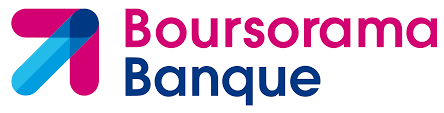



L'objectif de cet exercice sera de collecter les données en temps réelle des actions du CAC40.
Les données que nous collecterons serons :

- le nom de l'indice boursier
- le cours de l'action
- la variation de l'action
- la valeur la plus haute de la séance
- la valeur la plus basse
- la valeur d'ouverture
- la date et l'heure de la collecte


## Lancez le projet scrapy

Créez le projet scrapy nomé `boursorama` en utilisant le lien suivant `https://www.boursorama.com/bourse/actions/palmares/france/page-1`.

Pour rappel la commande scrapy pour génére un nouveau spider est la suivante :

`scrapy genspider nom_du_projet adresse_url`

In [ ]:
!cd WebCrawler && scrapy genspider (nom_du_projet::à compléter) (url_du_projet::à compléter)

## Modifiez le fichier items.py en ajoutant les champs à collecter

Ajoutez une class `ReviewsBoursoramaItem(scrapy.Item)` puis les champs avec la nomenclature `name = scrapy.Field()`

## Lancez le shell scrapy

`scrapy shell`

`url = 'https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC'`

`fetch(url)`

## Compléter le code suivant puis ajoutez-le au fichier `boursorama.py`.

In [40]:
import scrapy
from scrapy import Request
from WebCrawler.WebCrawler.items import ReviewsBoursoramaItem
from time import gmtime, strftime


class BoursoramaSpider(scrapy.Spider):
    name = 'boursorama'
    allowed_domains = ['finance.yahoo.com']
    start_urls = [f'https://www.boursorama.com/bourse/actions/palmares/france/page-{n}?france_filter%5Bmarket%5D=1rPCAC'
                  for n in range(1, 10)]

    def start_requests(self):
        for url in self.start_urls:
            yield Request(url=url, callback=self.parse_boursorama)

    def parse_boursorama(self, response):
        liste_indices = response.css('tr.c-table__row')[3:]

        for indices in liste_indices:
            item = ReviewsBoursoramaItem()

            #indice boursier
            try:
                item['nomIndice'] = indices.css('a::text').get()
            except:
                item['nomIndice'] = 'None'

            #indice cours de l'action
            try:
                item['coursAction'] = indices.css('span.c-instrument--last::text').get()
            except:
                item['coursAction'] = 'None'

            #Variation de l'action
            try:
                item['variationAction'] = indices.css('span.c-instrument--instant-variation::text').get()
            except:
                item['variationAction'] = 'None'

            #Valeur la plus haute
            try:
                item['ath'] = indices.css('span.c-instrument--high::text').get()
            except:
                item['ath'] = 'None'

            #Valeur la plus basse
            try:
                item['atl'] = indices.css('span.c-instrument--low::text').get()
            except:
                item['atl'] = 'None'

            #Valeur d'ouverture
            try:
                item['valeurOuverture'] = indices.css('span.c-instrument--open::text').get()
            except:
                item['valeurOuverture'] = 'None'

            #Date de la collecte
            try:
                item['collectDatetime'] = strftime("%Y-%m-%d %H:%M:%S", gmtime())
            except:
                item['collectDatetime'] = 'None'

            yield item

ImportError: cannot import name 'ReviewsBoursoramaItem' from 'WebCrawler.WebCrawler.items' (C:\Users\thomas.caron\Projects\webscraping\WebCrawler\WebCrawler\items.py)

## Executez la commande suivante afin de collecter vos données

In [ ]:
!cd WebCrawler/WebCrawler/spiders && scrapy crawl (nom_du_projet::à compléter) -o (nom_du_fichier_csv::à compléter)

# Bonus - [MyAnimeListe](https://myanimelist.net/manga.php?letter=A)

<img src='https://image.myanimelist.net/ui/OK6W_koKDTOqqqLDbIoPArR89MP-ulHxaLCJ2P-BfXg'>

Reproduisez l'ensemble de la procédure en collectant les données du site [MyAnimeListe](https://myanimelist.net/manga.php?letter=A).

Les données à collecter :
- le nom des animés
- l'image des animés
- la description des animés.

Utilisez la class `DataBase` pour stoquer vos donneés dans une base de données.

In [ ]:
import sqlalchemy as db


class DataBase():
    def __init__(self, name_database='database'):
        self.name = name_database
        self.url = f"sqlite:///{name_database}.db"
        self.engine = db.create_engine(self.url)
        self.connection = self.engine.connect()
        self.metadata = db.MetaData()
        self.table = self.engine.table_names()

    def create_table(self, name_table, **kwargs):
        colums = [db.Column(k, v, primary_key=True) if 'id_' in k else db.Column(k, v) for k, v in kwargs.items()]
        db.Table(name_table, self.metadata, *colums)
        self.metadata.create_all(self.engine)
        print(f"Table : '{name_table}' are created succesfully")

    def read_table(self, name_table, return_keys=False):
        table = db.Table(name_table, self.metadata, autoload=True, autoload_with=self.engine)
        if return_keys:
            table.columns.keys()
        else:
            return table

    def add_row(self, name_table, **kwarrgs):
        name_table = self.read_table(name_table)

        stmt = (
            db.insert(name_table).
            values(kwarrgs)
        )
        self.connection.execute(stmt)
        print(f'Row id added')

    def delete_row_by_id(self, table, id_):
        name_table = self.read_table(name_table)

        stmt = (
            db.delete(name_table).
            where(students.c.id_ == id_)
        )
        self.connection.execute(stmt)
        print(f'Row id {id_} deleted')

    def select_table(self, name_table):
        name_table = self.read_table(name_table)
        stm = db.select([name_table])
        return self.connection.execute(stm).fetchall()

In [ ]:
#Générer un projet scrapy
!cd WebCrawler && scrapy genspider manga https://myanimelist.net/manga.php?letter=A

# Collecter les données
!cd WebCrawler/WebCrawler/spiders && scrapy crawl (nom_du_projet::à compléter) -o (nom_du_fichier_CSV::à compléter)